In [1]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.optim as optim
import torch.nn.functional as F
import numpy as np

torch.manual_seed(1)

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

%matplotlib inline

# What is a Logistic regression
- 로지스틱 회귀는 독립 변수의 선형결합을 이용하여 사건의 발생 가능성을 예측하는 기법임.
- $log(\frac{y}{1-y})=X\beta+ \alpha$
- $log(y)= \frac{1}{\exp -(X\beta+\alpha)+1}$

<img src='./images/logistic_regression.png' width=300 align=left>

### 1. 데이터 생성

In [2]:
x1= torch.arange(1,101).float() + torch.randn(100)
x2 = torch.cat([torch.zeros(50)+torch.abs(torch.randn(50)),torch.ones(50)-torch.abs(torch.randn(50))])
x= torch.cat([x1.unsqueeze(1), x2.unsqueeze(1)],1)
print(x1.shape, x2.shape, x.shape)

y= torch.cat([torch.zeros(50), torch.ones(50)])
y= y.unsqueeze(1)
print(y.shape)

torch.Size([100]) torch.Size([100]) torch.Size([100, 2])
torch.Size([100, 1])


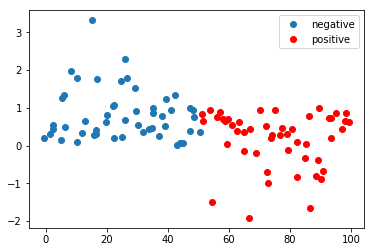

In [3]:
fig, ax= plt.subplots()
ax.plot(x[:,0].numpy()[:50], x[:,1].numpy()[:50],'o',label='negative')
ax.plot(x[:,0].numpy()[50:], x[:,1].numpy()[50:], 'ro', label='positive')
ax.legend()
plt.show()

### 2. 모델링
- $log(y)= \frac{1}{\exp -(X\beta+\alpha)+1}$

In [4]:
model= nn.Sequential(nn.Linear(2,1), nn.Sigmoid())

for param in model.named_parameters():
    print(param)
    
output= model(x)
print('<output> :',output[0]) # 0~1사이

('0.weight', Parameter containing:
tensor([[-0.4707,  0.5823]], requires_grad=True))
('0.bias', Parameter containing:
tensor([0.6233], requires_grad=True))
<output> : tensor([0.7291], grad_fn=<SelectBackward>)


### 3. 로스함수
- 분류문제에서는 주로 cross entropy error를 사용함.
$$loss(\hat{y}, y) = - \frac{1}{n} \sum_i (\hat{y}_{i} * log(y_{i}) + (1 - \hat{y}_{i}) * log(1 - y_{i}))$$


In [5]:
loss_function= nn.BCELoss()

### 4. 학습

In [23]:
EPOCH= 20000
learning_rate=0.01

for epoch in range(EPOCH):
    model.zero_grad()
    pred= model(x)
    loss= loss_function(pred, y)
    if epoch % 1000==0:
        print('%d / %d loss : %.3f' % (epoch, EPOCH, loss))
    
    loss.backward()
    for param in model.parameters():
        param.data += -learning_rate * param.grad.data
    # == optimizer.step()

0 / 20000 loss : 0.064
1000 / 20000 loss : 0.063
2000 / 20000 loss : 0.063
3000 / 20000 loss : 0.063
4000 / 20000 loss : 0.063
5000 / 20000 loss : 0.063
6000 / 20000 loss : 0.062
7000 / 20000 loss : 0.062
8000 / 20000 loss : 0.062
9000 / 20000 loss : 0.062
10000 / 20000 loss : 0.062
11000 / 20000 loss : 0.061
12000 / 20000 loss : 0.061
13000 / 20000 loss : 0.061
14000 / 20000 loss : 0.061
15000 / 20000 loss : 0.061
16000 / 20000 loss : 0.060
17000 / 20000 loss : 0.060
18000 / 20000 loss : 0.060
19000 / 20000 loss : 0.060


### 5. 결과 확인

In [24]:
def plot_decision_region(x,y,model):
    X_p = x.data.numpy()
    y_p = y.data.numpy().reshape(100)
    markers = ('x', 's')
    colors = ('blue', 'red')
    cmap = ListedColormap(colors[:len(np.unique(y_p))])

    # plot the decision surface
    x1_min, x1_max = X_p[:, 0].min() - 1, X_p[:, 0].max() + 1
    x2_min, x2_max = X_p[:, 1].min() - 1, X_p[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                           np.arange(x2_min, x2_max, 0.02))

    X_pp = Variable(torch.cat([torch.Tensor(xx1).view(-1,1),torch.Tensor(xx2).view(-1,1)],1))
    Z = torch.round(model(X_pp))
    Z = Z.float().data.numpy()
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y_p)):
        plt.scatter(x=X_p[y_p == cl, 0], 
                    y=X_p[y_p == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

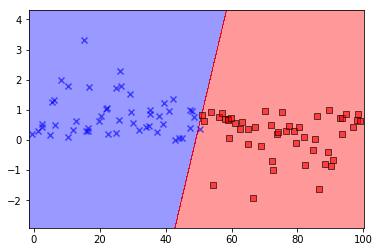

In [25]:
plot_decision_region(x,y,model)